# Data preprocessing with `pandas`

We'll work on a dataset for credit scoring that was proposed some years ago as a data challenge on some data challenge website.
It is a realistic dataset that contains a lot of missing values, several types of features (dates, categories, continuous features), so that a serious data cleaning and formating is required.

# Importing the data

We start by downloading the data. You need to do this only **once** since the next cell downloads the `gro` dataset. This dataset contains the following columns:

| Column name          | Description |
|:---------------------|:------------|
| BirthDate            | Date de naissance |
| Customer_Open_Date   | Date d'arrivée du client dans la filiale bancaire |
| Customer_Type        | Type de client (existant / nouveau) | 
| Educational_Level    | Niveau de diplôme |
| Id_Customer          | Identifiant du client |
| Marital_Status       | Situation familiale |
| Nb_Of_Products       | Nombre de produits détenus par le client à l'octroi |
| Net_Annual_Income    | Revenu annuel |
| Number_Of_Dependant  | Nombre de personnes à charge |
| P_Client             | Distinction des clients selon une caractéristique non définie ici |
| Prod_Category        | Catégorie du produit |
| Prod_Closed_Date     | Date de fermeture du produit |
| Prod_Decision_Date   | Date de décision de l'octroi (du financement) |
| Prod_Sub_Category    | Sous-catégorie du produit |
| Source               | Source de financement (Branch or Sales) |
| Type_Of_Residence    | Situation résidentielle |
| Y                    | Crédit accordé ou non | |
| Years_At_Business    | Nombre d'années dans son emploi actuel |
| Years_At_Residence   | Nombre d'années dans son lieu de résidence actuel |

In [1]:
import requests
import os

# The path containing your notebook
path_data = './'
# The name of the file
filename = 'gro.csv.gz'

if os.path.exists(os.path.join(path_data, filename)):
    print('The file %s already exists.' % os.path.join(path_data, filename))
else:
    url = 'http://stephanegaiffas.github.io/files/m2mo/gro.csv.gz'
    r = requests.get(url)
    with open(os.path.join(path_data, filename), 'wb') as f:
        f.write(r.content)
    print('Downloaded file %s.' % os.path.join(path_data, filename))

Downloaded file ./gro.csv.gz.


## A quick and easy (but actually bad) import

Let's import the data into a pandas dataframe, as simply as possible
The only thing we care about for now is the fact that the column separator 
is `';'` and not `','` as it should be in a `.csv` file.

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv(os.path.join(path_data, filename), sep=';')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
# Let's look at the first lines of the dataframe
data.head(n=5)

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,6714,0,Non Existing Client,02/09/1971,18/01/2012,NP_Client,University,Married,3.0,10,36,3.0,C,23/01/2012,Sales,Owned,1,NaN,B,NaN,NaN,NaN
1,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B,NaN,NaN,NaN
2,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G,NaN,NaN,NaN
3,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B,NaN,NaN,NaN
4,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L,NaN,NaN,NaN


In [5]:
# The list of column names
data.columns

Index(['Id_Customer', 'Y', 'Customer_Type', 'BirthDate', 'Customer_Open_Date',
       'P_Client', 'Educational_Level', 'Marital_Status',
       'Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income',
       'Years_At_Business', 'Prod_Sub_Category', 'Prod_Decision_Date',
       'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Closed_Date',
       'Prod_Category', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

**Remark**. There are weird columns in the end, they look empty. 
They don't appear in the description of the data.

In [6]:
# Let's look at the types used for each column
data.dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
BirthDate               object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income       object
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date        object
Prod_Category           object
Unnamed: 19            float64
Unnamed: 20            float64
Unnamed: 21            float64
dtype: object

In [7]:
data.BirthDate.head()

0    02/09/1971
1    07/08/1977
2    13/06/1974
3    07/11/1973
4    08/07/1982
Name: BirthDate, dtype: object

In [8]:
# Birth date is imported as a string (all columns containing dates do)
type(data['BirthDate'][0])

str

In [9]:
data['Prod_Sub_Category'].head()

0    C
1    C
2    C
3    C
4    C
Name: Prod_Sub_Category, dtype: object

In [10]:
# Product sub category is imported as a string
type(data['Prod_Sub_Category'][0])

str

In [11]:
data['Net_Annual_Income'].head(n=20)

0         36
1         36
2         18
3         36
4         36
5     59,916
6         36
7         60
8         36
9         36
10        40
11       500
12      87,6
13        36
14        18
15        36
16     29,82
17        36
18        36
19        36
Name: Net_Annual_Income, dtype: object

In [12]:
# Net actual income is a string as well ! While it is clearly a number
type(data['Net_Annual_Income'][0])

str

In [13]:
# Quick summary statistics of the dataset features'
data.describe(include='all')

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category,Unnamed: 19,Unnamed: 20,Unnamed: 21
count,6725.000000,6725.000000,6725,6725,6725,6725,6725,6725,6723.000000,6725.000000,6722,6721.000000,6725,6725,6725,6725,6725.000000,1434,6725,0.0,0.0,0.0
unique,NaN,NaN,2,5224,1371,2,4,5,NaN,NaN,625,NaN,3,278,2,5,NaN,349,13,NaN,NaN,NaN
top,NaN,NaN,Non Existing Client,01/01/1973,12/12/2011,NP_Client,University,Married,NaN,NaN,36,NaN,C,06/12/2011,Sales,Owned,NaN,30/05/2013,B,NaN,NaN,NaN
freq,NaN,NaN,4214,8,50,6213,5981,5268,NaN,NaN,2267,NaN,5783,58,5149,5986,NaN,116,3979,NaN,NaN,NaN
mean,4821.029740,0.072862,NaN,NaN,NaN,NaN,NaN,NaN,1.051614,12.564758,NaN,4.265734,NaN,NaN,NaN,NaN,1.086840,NaN,NaN,NaN,NaN,NaN
std,2775.505395,0.259930,NaN,NaN,NaN,NaN,NaN,NaN,1.332712,9.986257,NaN,7.255554,NaN,NaN,NaN,NaN,0.295033,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2399.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,4822.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,7209.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,17.000000,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


## Let's assess what we did

It appears that we have to work a little bit more. 
Here is the list of problems we have.
- The last three columns are weird and empty
- Dates are actually `str` (python's string type)
- There is a lot of missing values
- Categorial features are `str`
- The annual net income is imported as a string

By looking at the column names, basic statistics and the dataset 
description, we infer the type of features that we have.
There are dates features, continuous features, categorical features, and
some features could be either treated as categorical or continuous.

There is **a lot** of missing values, that need to be handled somehow.

The annual net income is imported as a string, we need to understand why.

We really need to treat dates as dates and not string (because we'd want to compute the age of a client based on its birth year for instance).

Here is the structure of the features.

**Continuous features**
- Years_At_Residence
- Net_Annual_Income
- Years_At_Business

**To decide features**
- Number_Of_Dependant
- Nb_Of_Products

**Categorical features are**
- Customer_Type
- P_Client
- Educational_Level
- Marital_Status
- Prod_Sub_Category
- Source
- Type_Of_Residence
- Prod_Category

**Date features are**
- BirthDate
- Customer_Open_Date
- Prod_Decision_Date
- Prod_Closed_Date

# A closer look at the import problems

Let's find solutions to all these import problems.

## The last three columns are weird and empty 

It seems to come from the fact that the data always ends with several `';'` characters. Let's simply remove them using the `usecols`
option.

## Dates are actually `str` (python's string type)

We need to specify which columns must be encoded as dates using the `parse_dates` option. Fortunately enough, the `pandas` is clever enough to interpret the date format.

In [14]:
type(data['BirthDate'][0])

str

## There is a lot of missing values 

We'll see below that actually a single column mostly contain missing values.

In [15]:
data.isnull().sum()

Id_Customer               0
Y                         0
Customer_Type             0
BirthDate                 0
Customer_Open_Date        0
P_Client                  0
Educational_Level         0
Marital_Status            0
Number_Of_Dependant       2
Years_At_Residence        0
Net_Annual_Income         3
Years_At_Business         4
Prod_Sub_Category         0
Prod_Decision_Date        0
Source                    0
Type_Of_Residence         0
Nb_Of_Products            0
Prod_Closed_Date       5291
Prod_Category             0
Unnamed: 19            6725
Unnamed: 20            6725
Unnamed: 21            6725
dtype: int64

In [16]:
# The "product closed date" seems to contain a lot of missing values !
data[['Prod_Closed_Date']].head(5)

,Prod_Closed_Date
0,NaN
1,NaN
2,NaN
3,NaN
4,31/12/2012


In [17]:
# We remove the useless columns from the dataframe
data = data.drop(['Prod_Closed_Date', 'Unnamed: 19', 
                            'Unnamed: 20', 'Unnamed: 21'], axis=1)

In [18]:
data.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category
0,6714,0,Non Existing Client,02/09/1971,18/01/2012,NP_Client,University,Married,3.0,10,36,3.0,C,23/01/2012,Sales,Owned,1,B
1,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,B
2,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,G
3,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,B
4,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,L


In [19]:
# The remaining lines with missing values
data[data.isnull().any(axis=1)]

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category
105,9407,0,Non Existing Client,17/05/1956,17/04/2012,NP_Client,University,Married,0.0,1,36,NaN,C,18/04/2012,Sales,Owned,1,D
793,8953,1,Existing Client,07/06/1990,20/09/2010,P_Client,University,Single,NaN,21,"33,6",1.0,C,18/04/2012,Branch,Owned,2,G
2349,9399,0,Non Existing Client,16/04/1968,17/04/2012,NP_Client,University,Married,0.0,10,NaN,10.0,C,18/04/2012,Sales,Owned,1,B
2400,8826,0,Existing Client,03/01/1980,20/03/2005,NP_Client,University,Married,1.0,8,NaN,9.0,C,17/04/2012,Branch,Owned,1,B
2484,398,0,Non Existing Client,14/05/1984,19/05/2011,NP_Client,Master/PhD,Single,0.0,10,25,NaN,C,26/05/2011,Branch,Owned,2,D
3438,5882,0,Non Existing Client,08/08/1981,14/12/2011,NP_Client,University,Married,0.0,2,108,NaN,C,27/12/2011,Branch,Owned,1,B
6307,9588,0,Existing Client,05/07/1950,18/09/2004,NP_Client,Master/PhD,Married,NaN,10,50,10.0,C,26/04/2012,Sales,Owned,1,B
6355,8777,0,Existing Client,10/09/1985,18/09/2003,NP_Client,Master/PhD,Single,0.0,26,36,NaN,C,19/03/2012,Branch,Owned,1,D
6431,9555,0,Non Existing Client,15/01/1951,23/04/2012,NP_Client,University,Married,0.0,11,NaN,0.0,C,26/04/2012,Branch,Old rent,2,B


## Categorial features are `str`

We need to say the dtype we want to use for some columns using the `dtype` option.

In [20]:
# Product sub category is imported as a string
type(data['Prod_Sub_Category'][0])

str

In [21]:
data['Prod_Sub_Category'].unique()

array(['C', 'G', 'P'], dtype=object)

## The annual net income is imported as a string

This problem comes from the fact that the decimal separator is in European notation: it's a `','` and not a `'.'`, so we need to specify it using the `decimal` option.

In [22]:
type(data['Net_Annual_Income'][0])

str

In [23]:
data['Net_Annual_Income'].head(n=10)

0        36
1        36
2        18
3        36
4        36
5    59,916
6        36
7        60
8        36
9        36
Name: Net_Annual_Income, dtype: object

# A better import of the data

## Let's import again the data

- We build a dict that specifies the types to use for each column 
and pass it to `read_csv` using the `dtype` option
- We also specify the `decimal`, `usecols` and `parse_dates` options.

**Important remark (expert)**. Some columns could be `np.int`. 
However, `pandas` (actually its `numpy`) does not support columns 
with integer dtype and missing values.

In [24]:
gro_dtypes = {
    'Years_At_Residence': np.int,
    'Net_Annual_Income' : np.float,
    'Years_At_Business': np.float,
    'Number_Of_Dependant': np.float,
    'Nb_Of_Products': np.int,
    'Customer_Type': 'category',
    'P_Client': 'category',
    'Educational_Level': 'category',
    'Marital_Status': 'category',
    'Prod_Sub_Category': 'category',
    'Source': 'category',
    'Type_Of_Residence': 'category',
    'Prod_Category': 'category',
}

data = pd.read_csv(os.path.join(path_data, filename), 
                   sep=';', decimal=',', usecols=range(19),
                   parse_dates=['BirthDate', 'Customer_Open_Date', 
                                'Prod_Decision_Date', 'Prod_Closed_Date'],
                   dtype=gro_dtypes)

In [25]:
data.dtypes

Id_Customer                     int64
Y                               int64
Customer_Type                category
BirthDate              datetime64[ns]
Customer_Open_Date     datetime64[ns]
P_Client                     category
Educational_Level            category
Marital_Status               category
Number_Of_Dependant           float64
Years_At_Residence              int64
Net_Annual_Income             float64
Years_At_Business             float64
Prod_Sub_Category            category
Prod_Decision_Date     datetime64[ns]
Source                       category
Type_Of_Residence            category
Nb_Of_Products                  int64
Prod_Closed_Date       datetime64[ns]
Prod_Category                category
dtype: object

In [26]:
# Product subcategory is imported as a string as well
data['Prod_Sub_Category'].head()

0    C
1    C
2    C
3    C
4    C
Name: Prod_Sub_Category, dtype: category
Categories (3, object): ['C', 'G', 'P']

In [27]:
data['BirthDate'].head()

0   1971-02-09
1   1977-07-08
2   1974-06-13
3   1973-07-11
4   1982-08-07
Name: BirthDate, dtype: datetime64[ns]

In [28]:
data['BirthDate'][0]

Timestamp('1971-02-09 00:00:00')

In [29]:
# So let's simply remove this column for now
prod_closed_date = data.pop('Prod_Closed_Date')
data.shape

(6725, 18)

In [30]:
# And remove the remaining rows with missing values
data = data.dropna()
data.shape

(6716, 18)

In [31]:
# Now we save the cleaned dataset it into a CSV file
data.to_csv(os.path.join(path_data, 'gro_cleaned.csv'))

## The net income columns is very weird

In [32]:
data.columns

Index(['Id_Customer', 'Y', 'Customer_Type', 'BirthDate', 'Customer_Open_Date',
       'P_Client', 'Educational_Level', 'Marital_Status',
       'Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income',
       'Years_At_Business', 'Prod_Sub_Category', 'Prod_Decision_Date',
       'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Category'],
      dtype='object')

In [33]:
income = data['Net_Annual_Income']
income.describe()

count     6716.000000
mean        60.954422
std        235.973454
min          0.001000
25%         20.000000
50%         36.000000
75%         36.000000
max      10000.000000
Name: Net_Annual_Income, dtype: float64

The net income has a very weird distribution: a non-negligible number of very large values.

In [34]:
(income <= 100).sum(), (income > 100).sum()

(6281, 435)

Most values are smaller than 100, while some are much larger...

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context("notebook", font_scale=1.2)

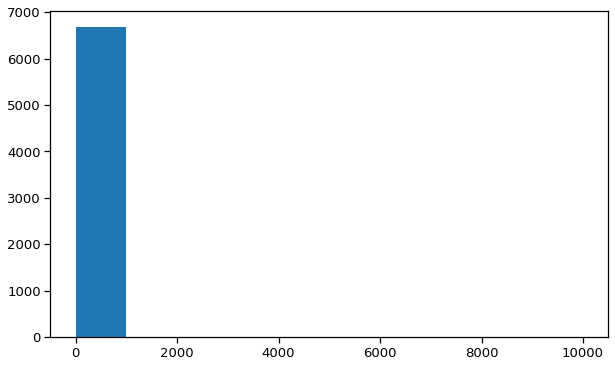

In [36]:
plt.figure(figsize=(10, 6))
_ = plt.hist(income, bins=10)

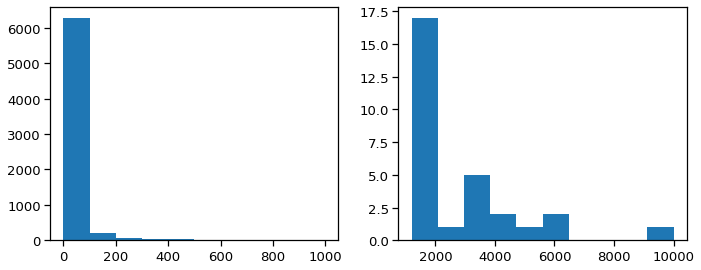

In [37]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(income[income <= 1000])
plt.subplot(1, 2, 2)
plt.hist(income[income > 1000])
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


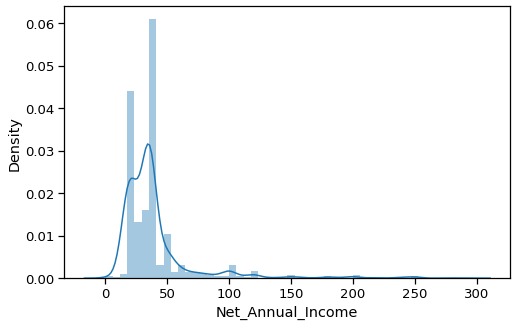

In [38]:
plt.figure(figsize=(8, 5))
sns.distplot(income[income < 300])

Seems that there's a bug in the net income features. 
Some numbers are in kilo euros, while others are in euros.
Let's clean this by removing the rows with an income larger than 200.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


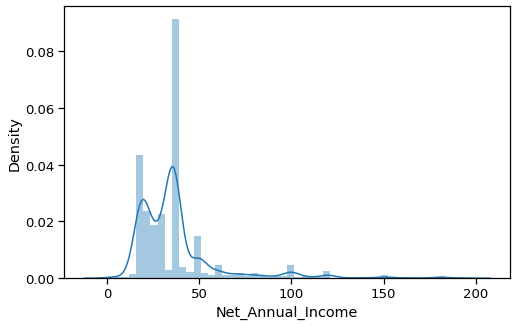

In [39]:
plt.figure(figsize=(8, 5))
sns.distplot(income[income < 200])

In [40]:
data = data[income <= 200]

# Some data visualization with `pandas` + `seaborn`

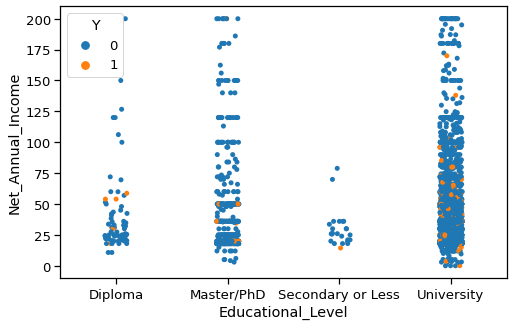

In [41]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='Educational_Level', y='Net_Annual_Income', hue='Y', 
              jitter=True, data=data)

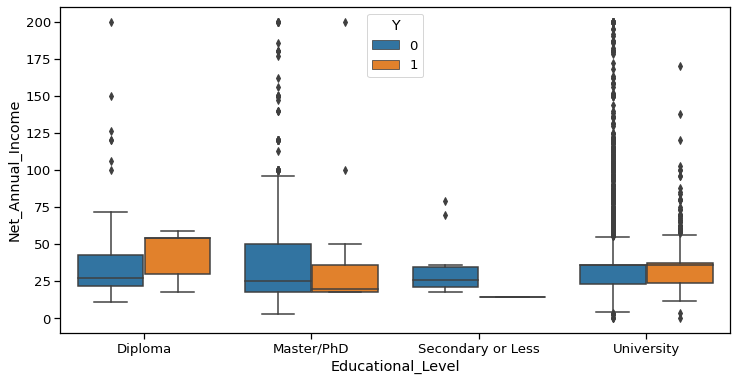

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Educational_Level', y='Net_Annual_Income', 
            hue='Y', data=data)

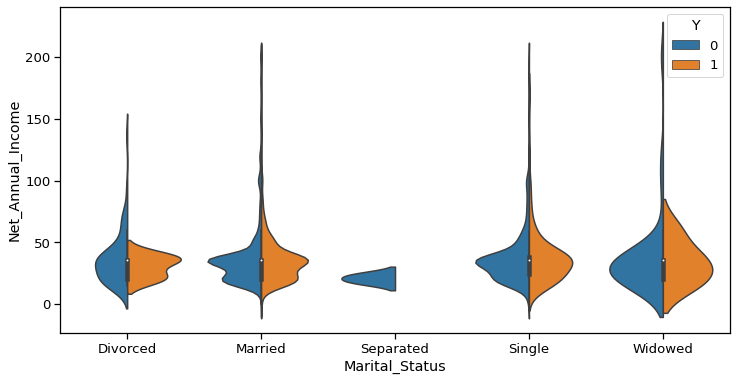

In [43]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Marital_Status', y='Net_Annual_Income', 
               hue='Y', split=True, data=data)

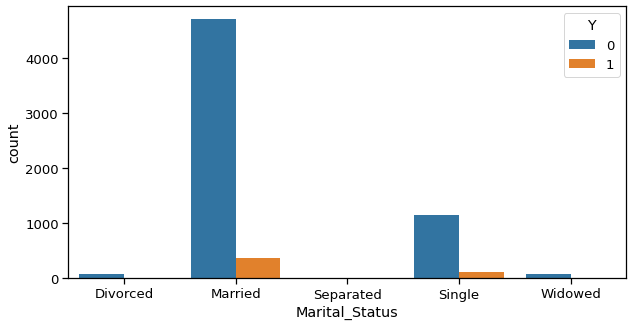

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital_Status', hue='Y', data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

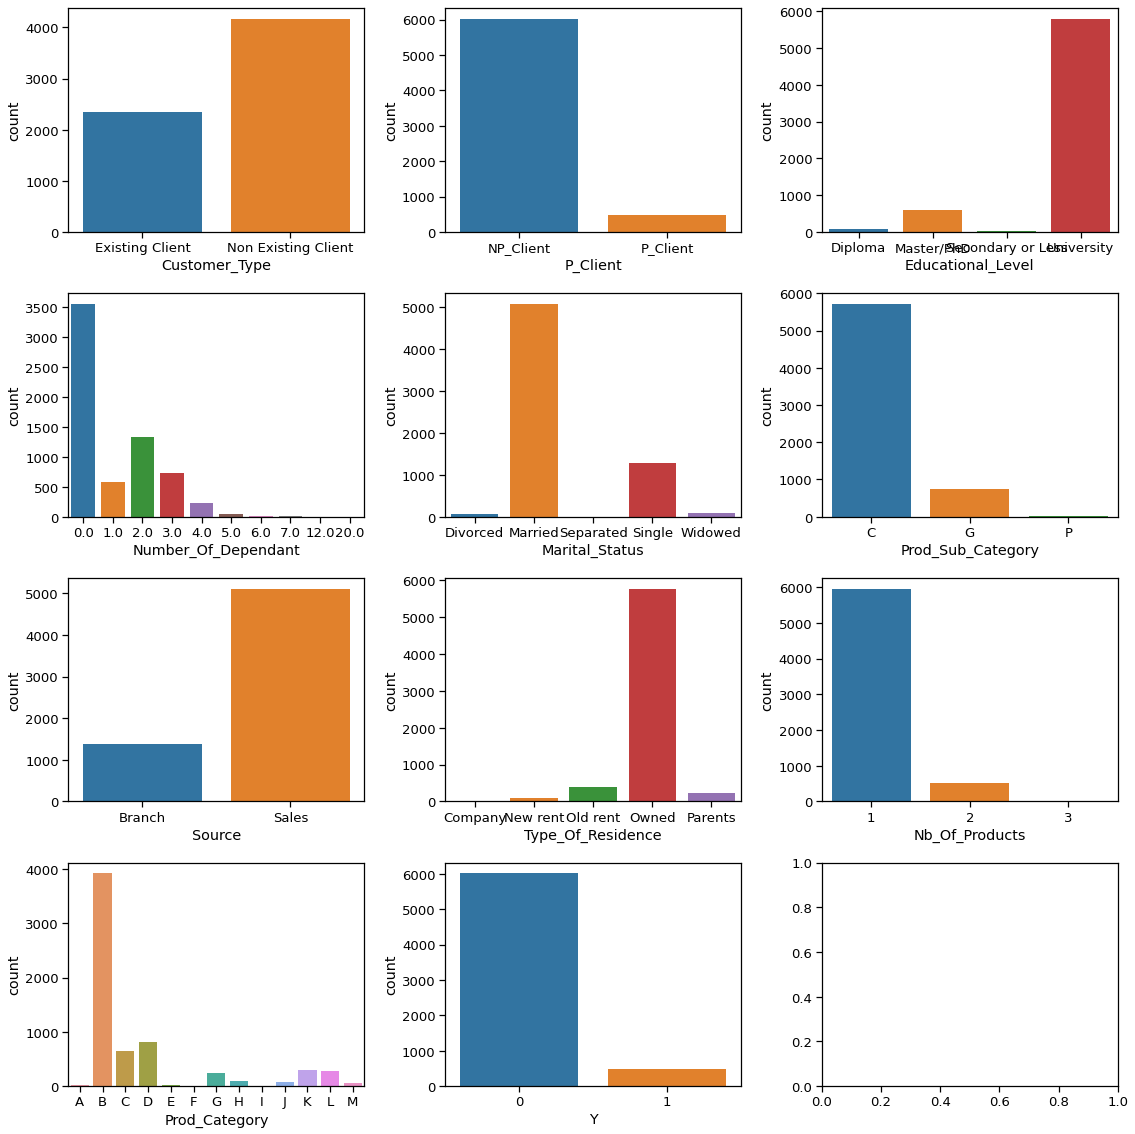

In [45]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
columns = ['Customer_Type', 'P_Client', 'Educational_Level', 
           'Number_Of_Dependant', 'Marital_Status', 'Prod_Sub_Category',
           'Source', 'Type_Of_Residence', 'Nb_Of_Products', 
           'Prod_Category', 'Y']

for i, colname in enumerate(columns):
    sns.countplot(colname, data=data, ax=fig.axes[i])
plt.tight_layout()

# Final preparation of the dataset

In [46]:
# First we make lists of continuous, categorial and date features

cnt_featnames = [
    'Years_At_Residence',
    'Net_Annual_Income',
    'Years_At_Business',
    'Number_Of_Dependant'
]

cat_featnames = [
    'Customer_Type',
    'P_Client',
    'Educational_Level',
    'Marital_Status',
    'Prod_Sub_Category',
    'Source',
    'Type_Of_Residence',
    'Prod_Category',
    'Nb_Of_Products'
]

date_featnames = [
    'BirthDate',
    'Customer_Open_Date',
    'Prod_Decision_Date'
#    'Prod_Closed_Date'
]

## Creation of the features matrix

In [47]:
data[cnt_featnames].head()

,Years_At_Residence,Net_Annual_Income,Years_At_Business,Number_Of_Dependant
0,10,36.0,3.0,3.0
1,1,36.0,1.0,3.0
2,12,18.0,2.0,0.0
3,10,36.0,1.0,2.0
4,3,36.0,1.0,3.0


In [48]:
bin_features = pd.get_dummies(data[cat_featnames],
                              prefix_sep='#', drop_first=True)

In [49]:
bin_features.head()

,Nb_Of_Products,Customer_Type#Non Existing Client,P_Client#P_Client,Educational_Level#Master/PhD,Educational_Level#Secondary or Less,Educational_Level#University,Marital_Status#Married,Marital_Status#Separated,Marital_Status#Single,Marital_Status#Widowed,Prod_Sub_Category#G,Prod_Sub_Category#P,Source#Sales,Type_Of_Residence#New rent,Type_Of_Residence#Old rent,Type_Of_Residence#Owned,Type_Of_Residence#Parents,Prod_Category#B,Prod_Category#C,Prod_Category#D,Prod_Category#E,Prod_Category#F,Prod_Category#G,Prod_Category#H,Prod_Category#I,Prod_Category#J,Prod_Category#K,Prod_Category#L,Prod_Category#M
0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
cnt_features = data[cnt_featnames]
cnt_features.head()

,Years_At_Residence,Net_Annual_Income,Years_At_Business,Number_Of_Dependant
0,10,36.0,3.0,3.0
1,1,36.0,1.0,3.0
2,12,18.0,2.0,0.0
3,10,36.0,1.0,2.0
4,3,36.0,1.0,3.0


In [51]:
from pandas import Timestamp

def age(x):
    today = Timestamp.today()
    return (today - x).dt.days

date_features = data[date_featnames].apply(age, axis=0)
date_features.head()

,BirthDate,Customer_Open_Date,Prod_Decision_Date
0,18151,3198,3193
1,15810,3172,3171
2,16931,4219,3400
3,17268,3152,3121
4,13954,3344,3391


## Final features matrix

In [52]:
all_features = pd.concat([bin_features, cnt_features, date_features], axis=1)

In [53]:
all_features.columns

Index(['Nb_Of_Products', 'Customer_Type#Non Existing Client',
       'P_Client#P_Client', 'Educational_Level#Master/PhD',
       'Educational_Level#Secondary or Less', 'Educational_Level#University',
       'Marital_Status#Married', 'Marital_Status#Separated',
       'Marital_Status#Single', 'Marital_Status#Widowed',
       'Prod_Sub_Category#G', 'Prod_Sub_Category#P', 'Source#Sales',
       'Type_Of_Residence#New rent', 'Type_Of_Residence#Old rent',
       'Type_Of_Residence#Owned', 'Type_Of_Residence#Parents',
       'Prod_Category#B', 'Prod_Category#C', 'Prod_Category#D',
       'Prod_Category#E', 'Prod_Category#F', 'Prod_Category#G',
       'Prod_Category#H', 'Prod_Category#I', 'Prod_Category#J',
       'Prod_Category#K', 'Prod_Category#L', 'Prod_Category#M',
       'Years_At_Residence', 'Net_Annual_Income', 'Years_At_Business',
       'Number_Of_Dependant', 'BirthDate', 'Customer_Open_Date',
       'Prod_Decision_Date'],
      dtype='object')

In [54]:
all_features.head()

,Nb_Of_Products,Customer_Type#Non Existing Client,P_Client#P_Client,Educational_Level#Master/PhD,Educational_Level#Secondary or Less,Educational_Level#University,Marital_Status#Married,Marital_Status#Separated,Marital_Status#Single,Marital_Status#Widowed,Prod_Sub_Category#G,Prod_Sub_Category#P,Source#Sales,Type_Of_Residence#New rent,Type_Of_Residence#Old rent,Type_Of_Residence#Owned,Type_Of_Residence#Parents,Prod_Category#B,Prod_Category#C,Prod_Category#D,Prod_Category#E,Prod_Category#F,Prod_Category#G,Prod_Category#H,Prod_Category#I,Prod_Category#J,Prod_Category#K,Prod_Category#L,Prod_Category#M,Years_At_Residence,Net_Annual_Income,Years_At_Business,Number_Of_Dependant,BirthDate,Customer_Open_Date,Prod_Decision_Date
0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,10,36.0,3.0,3.0,18151,3198,3193
1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,36.0,1.0,3.0,15810,3172,3171
2,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,12,18.0,2.0,0.0,16931,4219,3400
3,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,10,36.0,1.0,2.0,17268,3152,3121
4,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,36.0,1.0,3.0,13954,3344,3391


**VERY IMPORTANT**: we removed lines of data that contained missing values. The index of the dataframe is
    therefore not contiguous anymore

In [55]:
all_features.index.max()

6724

This could be a problem for later. So let's reset the index to get a contiguous one

In [56]:
all_features.shape

(6499, 36)

In [57]:
all_features.reset_index(inplace=True, drop=True)

In [58]:
all_features.head()

,Nb_Of_Products,Customer_Type#Non Existing Client,P_Client#P_Client,Educational_Level#Master/PhD,Educational_Level#Secondary or Less,Educational_Level#University,Marital_Status#Married,Marital_Status#Separated,Marital_Status#Single,Marital_Status#Widowed,Prod_Sub_Category#G,Prod_Sub_Category#P,Source#Sales,Type_Of_Residence#New rent,Type_Of_Residence#Old rent,Type_Of_Residence#Owned,Type_Of_Residence#Parents,Prod_Category#B,Prod_Category#C,Prod_Category#D,Prod_Category#E,Prod_Category#F,Prod_Category#G,Prod_Category#H,Prod_Category#I,Prod_Category#J,Prod_Category#K,Prod_Category#L,Prod_Category#M,Years_At_Residence,Net_Annual_Income,Years_At_Business,Number_Of_Dependant,BirthDate,Customer_Open_Date,Prod_Decision_Date
0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,10,36.0,3.0,3.0,18151,3198,3193
1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,36.0,1.0,3.0,15810,3172,3171
2,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,12,18.0,2.0,0.0,16931,4219,3400
3,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,10,36.0,1.0,2.0,17268,3152,3121
4,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,36.0,1.0,3.0,13954,3344,3391


## Let's save the data using `pickle`

In [59]:
import pickle as pkl

X = all_features
y = data['Y']

data_pkl = {}
data_pkl['features'] = X
data_pkl['labels'] = y

data_pkl['cnt_featnames'] = cnt_featnames
data_pkl['cat_featnames'] = cat_featnames
data_pkl['date_featnames'] = date_featnames

with open(os.path.join(path_data, 'gro_training.pkl'), 'wb') as f:
    pkl.dump(data_pkl, f)

The preprocessed data is saved in a pickle file called `gro_training.pkl`.

## Another approach using `scikit-learn`

In [60]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# First we create a scikit-learn encoder that computes 
#  the age in days of columns containing dates
class AgeEncoder(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        self.today = Timestamp.today()
        return self

    def transform(self, X):
        return X.apply(lambda x: (x - self.today).dt.days, axis=0)

# Centers and reduces (variance=1) columns
standard_scaler = StandardScaler()

# One-hot encode, similar to pd.get_dummies
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# A pipeline that first computes age, and standardizes it
scaled_age_encoder = Pipeline([
    ('age', AgeEncoder()),
    ('scaling', StandardScaler())
])

# Let's combine all these transformations
transformer = ColumnTransformer([
    ('standard_scaling', standard_scaler, cnt_featnames),
    ('one_hot_encoding', one_hot_encoder, cat_featnames),
    ('dates_age_scaled', scaled_age_encoder, date_featnames)
])

transformer.fit_transform(data)

array([[-0.25216951, -0.06521361, -0.14892949, ..., -0.11770611,
         0.45331741,  0.45876038],
       [-1.15555939, -0.06521361, -0.44569257, ...,  0.46853557,
         0.47839107,  0.61085926],
       [-0.0514162 , -0.75258427, -0.29731103, ...,  0.1878107 ,
        -0.53130597, -0.97235181],
       ...,
       [ 0.14933711, -0.8900584 ,  3.85737204, ..., -1.97534847,
         0.30287544, -0.64741329],
       [-1.15555939, -0.06521361, -0.44569257, ...,  0.97188703,
         0.45042429,  0.43110604],
       [ 0.24971376, -0.29433716, -0.44569257, ...,  0.91479045,
         0.36266648, -0.17037589]])